In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("type of the Diamond new.csv")
data.head(5)

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x (Premium)    53940 non-null  float64
 8   z (Very Good)  53940 non-null  float64
 9   y (Good)       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
le=LabelEncoder()
data["cut"]=le.fit_transform(data["cut"])
data["color"]=le.fit_transform(data["color"])
data["clarity"]=le.fit_transform(data["clarity"])

In [5]:
data.describe()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,2.553003,2.594197,3.835150,0.797940,61.749405,57.457184,3932.799722,5.731157,3.538734,5.734526
std,1.027708,1.701105,1.724591,0.474011,1.432621,2.234491,3989.439738,1.121761,0.705699,1.142135
min,0.000000,0.000000,0.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,0.400000,61.000000,56.000000,950.000000,4.710000,2.910000,4.720000
50%,2.000000,3.000000,4.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,3.530000,5.710000
75%,3.000000,4.000000,5.000000,1.040000,62.500000,59.000000,5324.250000,6.540000,4.040000,6.540000
max,4.000000,6.000000,7.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,31.800000,58.900000


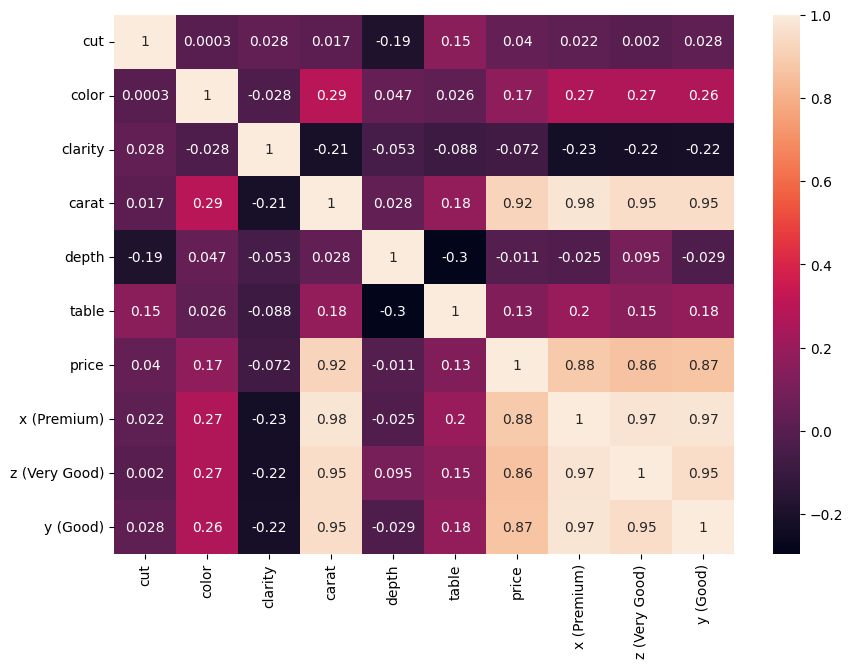

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [7]:
ss=StandardScaler()
x=data.drop(["price"],axis=1)
y=data["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [8]:
models={
    "Random Forest Regresion":RandomForestRegressor(),
     "Ada Boost Regression":AdaBoostRegressor(),
    "Gradient Boost Regression":GradientBoostingRegressor(),
    "Linear Regression":LinearRegression()
}

In [11]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=r2_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")

Random Forest Regresion
97.98544686539674
Ada Boost Regression
88.04047715608607
Gradient Boost Regression
96.92412019674089
Linear Regression
87.38740035252037


In [13]:
results={
    "Model":["Random Forest Regression","Ada Boost Regression","Gradiant Boosting Regression","Linear Regression"],
    "Accuracy":[97.98,88.04,96.92,87.38]
}

In [14]:
result=pd.DataFrame(results)

<Axes: xlabel='Accuracy', ylabel='Model'>

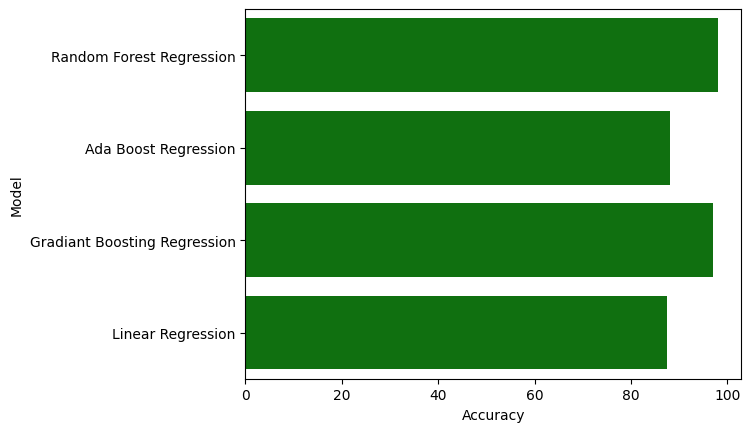

In [17]:
sns.barplot(y="Model",x="Accuracy",data=result,color="green")